**Q.1: Gradient Descent Problem**

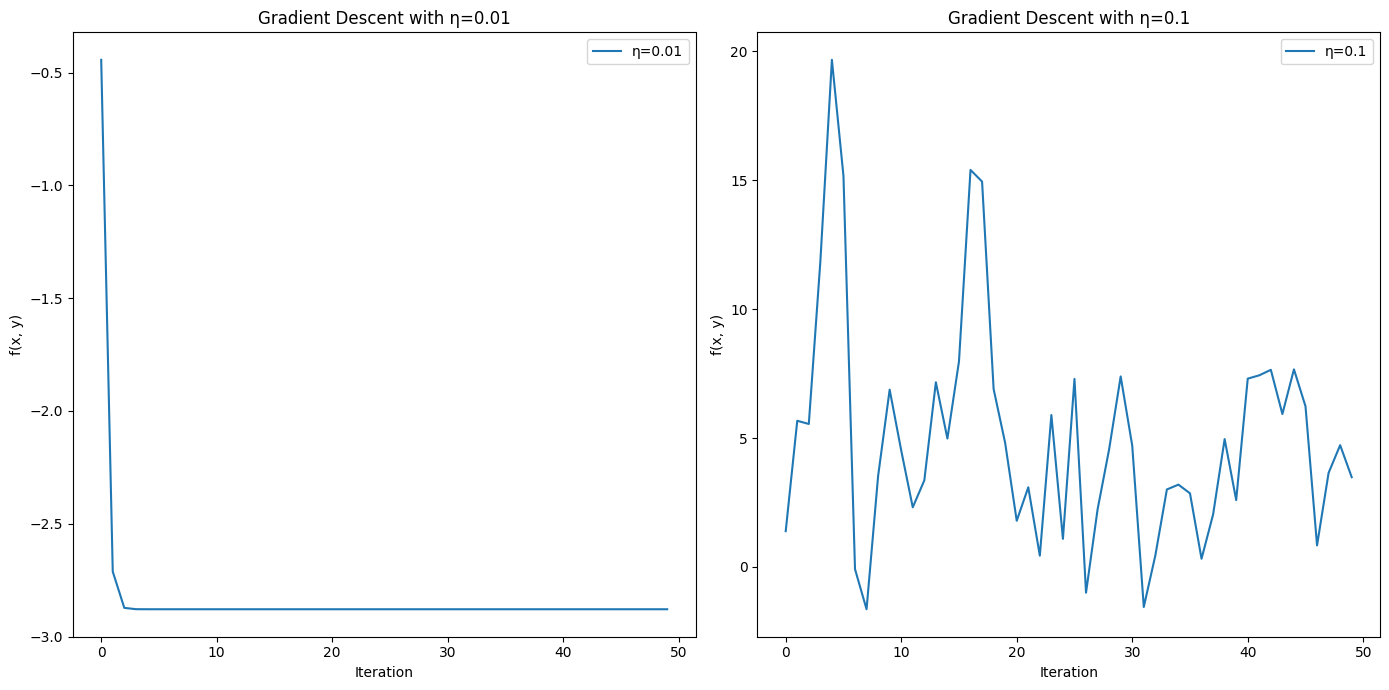

In [ ]:
#Part-a
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradients
def f(x, y):
    return 2*x**2 + y**2 + 3*np.sin(2*np.pi*x)*np.cos(2*np.pi*y)

def dfdx(x, y):
    return 4*x + 6*np.pi*np.cos(2*np.pi*x)*np.cos(2*np.pi*y)

def dfdy(x, y):
    return 2*y - 6*np.pi*np.sin(2*np.pi*x)*np.sin(2*np.pi*y)

# Gradient descent function
def gradient_descent(x_start, y_start, learning_rate, n_iterations):
    x, y = x_start, y_start
    history = []  # to store the history of function values

    for i in range(n_iterations):
        x -= learning_rate * dfdx(x, y)
        y -= learning_rate * dfdy(x, y)
        history.append(f(x, y))

    return x, y, history

# Initial setup
x_start, y_start = 0.1, 0.1
learning_rates = [0.01, 0.1]
n_iterations = 50

# Run gradient descent and plot for each learning rate
plt.figure(figsize=(14, 7))

for i, eta in enumerate(learning_rates):
    _, _, history = gradient_descent(x_start, y_start, eta, n_iterations)
    plt.subplot(1, 2, i+1)
    plt.plot(history, label=f'η={eta}')
    plt.xlabel('Iteration')
    plt.ylabel('f(x, y)')
    plt.title(f'Gradient Descent with η={eta}')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#Part-b
# Define the starting points
starting_points = [
    (0.1, 0.1),
    (1, 1),
    (0.5, 0.5),
    (0.0, 0.5),
    (-0.5, -0.5),
    (-1, 1)
]

# Learning rate and iterations setup
learning_rate = 0.01
n_iterations = 50

# Results dictionary to store the minimum values and locations
results = {}

# Perform gradient descent for each starting point
for i, (x_start, y_start) in enumerate(starting_points):
    x_min, y_min, _ = gradient_descent(x_start, y_start, learning_rate, n_iterations)
    min_value = f(x_min, y_min)
    results[f'Point {i+1}'] = {'Starting Point': (x_start, y_start), 'Minimum Location': (x_min, y_min), 'Minimum Value': min_value}

results


{'Point 1': {'Starting Point': (0.1, 0.1),
  'Minimum Location': (-0.24182894588827972, -3.265192092903909e-36),
  'Minimum Value': -2.8790846587644263},
 'Point 2': {'Starting Point': (1, 1),
  'Minimum Location': (0.7252678803578846, 0.9831635693235358),
  'Minimum Value': -0.9286447086312588},
 'Point 3': {'Starting Point': (0.5, 0.5),
  'Minimum Location': (0.24181813075114938, 0.49168225906848034),
  'Minimum Value': -2.633242590975637},
 'Point 4': {'Starting Point': (0.0, 0.5),
  'Minimum Location': (0.2418181307511494, 0.4916822590684804),
  'Minimum Value': -2.633242590975637},
 'Point 5': {'Starting Point': (-0.5, -0.5),
  'Minimum Location': (-0.7253691676028068, -0.49159419340046656),
  'Minimum Value': -1.6660267055389741},
 'Point 6': {'Starting Point': (-1, 1),
  'Minimum Location': (-1.2084759495263577, 0.9827889176425988),
  'Minimum Value': 1.0051615759793315}}

**Q.2 Classifying Handwritten Digits: 1 vs. 5.**

**Q.2 - A**

In [ ]:
def readData(fname='ZipDigits.train'):
    '''
    Input:
        fname: name of file containing N examples, each with d attributes
    Output:
        X: N x d+1 numpy array
        y: N x 1 numpy array
    '''
    with open(fname) as f:
        X = []
        y = []
        rlines = f.readlines()
        for line in rlines:
            row = line.rstrip().split(' ')
            yval = int(float(row[0]))
            if yval in [1,5]:
              y.append(yval)
              xvals = [float(pixel) for pixel in row[1:]]
              X.append(xvals)
        X = np.array(X)
        y = np.array(y)
        y = y.reshape((y.shape[0], 1))
        print(f'X shape: {X.shape}')
        print(f'y shape: {y.shape}')
        return X, y

In [ ]:
#Importing / Reading the Dataset

#Train Dataset
Xdigitstrain, ydigitstrain = readData('ZipDigits.train')
Ndigitstrain, pixels = Xdigitstrain.shape
assert(Ndigitstrain == ydigitstrain.shape[0])

#Test Dataset
Xdigitstest, ydigitstest = readData('ZipDigits.test')
Ndigitstest, pixels = Xdigitstest.shape
assert(Ndigitstest == ydigitstest.shape[0])

X shape: (1332, 256)
y shape: (1332, 1)
X shape: (424, 256)
y shape: (424, 1)


In [ ]:
def indexDigits(y):
    '''
    A helper function to locate examples by label
    Input:
        y: N x 1 2 dimensional numpy array; labels for handwritten digits
    Output:
        digit_idxs: a dictionary; the keys are digits 0 -- 9
                    for a digit k, digit_idxs[k] is a list identifying the rows labeled with digit k
    '''
    N = y.shape[0]
    digit_idxs = {}
    for n in range(N):
        digit = ydigitstrain[n, 0]
        if not digit in digit_idxs:
            digit_idxs[digit] = []
        digit_idxs[digit].append(n)
    return digit_idxs

# This Function will compute Misclassification Error
def error(w, x, y, R=None):
    '''
    Point-wise error measure for binary classification
    Input:
        w: a d x 1 2-dimensional numpy array (weight vector)
        x: a d x 1 2-dimensional numpy array (data point)
        y: a scalar value (true label, either -1 or 1)
        R: Risk weights; a dictionary (optional)
           whose keys are tuples (y, yhat) with
           value equal to the cost of predicting yhat when the label is y
    Output:
        error: misclassification error of hypothesis w on data point x with true label y
    '''
    yhat = np.sign(np.dot(w.T, x))

    if R is not None and isinstance(R, dict):
        cost = R.get((y, yhat), 1.0)
    else:
        cost = 1.0

    if yhat != y:
        error_value = cost
    else:
        error_value = 0.0

    return error_value


def E(w, X, y, R=None):
    '''
    point-wise error measure for classification
    Input:
        w: a d x 1 2-dimensional numpy array
        X: an N x d 2-dimensional numpy array
        y: an N x 1 2-dimensional numpy array
        R: Risk weights; a dictionary
           whose keys are tuples (y, yhat) with
           value equal to the cost of predicting yhat when the label is y
    Output:
        error: misclassification error of hypothesis w on data points in X with true labels y
    '''
    N = X.shape[0]

    # Compute the predicted labels (yhat) using the sigmoid function
    yhat = np.sign(np.dot(X, w))  # Assuming binary classification, using sign function

    # Compute the misclassification error
    error = np.mean(yhat != y)  # Misclassification error is the average of incorrect predictions

    return error

#Function to Plot Linear Separator
def plotLinearSeparator(w, X, y, title='', Xs=None, Xlabels=None, markers=None):
    '''
    Plot data points a linear separator
    Input:
        w: a 2D (d+1) x 1 numpy array
        X: a 2D N x (d+1) numpy array
        y: a 2D N x 1 numpy array
        title: a string
    Output:
        error: misclassification error of hypothesis w on data points in X with true labels y
    '''
    '''
    Plot data points in X, y
    '''
    plus1s = np.where(y == 1)[0]
    minus1s = np.where(y == -1)[0]
    Xplus1s = X[plus1s, :]
    Xminus1s = X[minus1s, :]

    plt.figure(figsize=(8, 6))
    plt.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o', color='blue', label='Class 1')
    plt.scatter(Xminus1s[:, 1], Xminus1s[:, 2], marker='x', color='red', label='Class -1')
    plt.xlabel('Feature-1 (Intensity)')
    plt.ylabel('Feature-2 (Symmetry)')

    pltxs = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
    pltys = - (w[0] + w[1] * pltxs) / w[2]
    plt.plot(pltxs, pltys, color='green', label='Linear Separator')

    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
#Computing the features to develop the distinguishing factor between digits 1 and 5

def computeIntensity(X):
    '''
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        intensities: a 2 dimensional N x 1 numpy array
                     each row consists of a single value representing the
                     average pixel intesity of the corresponding image
                     See LFD Example 3.1
    '''
    print('computing intensity feature')
    N, d = X.shape
    print(f'Input shape {N}, {d}')
    intensities = np.mean(X, axis=1, keepdims=True) / 255.0
    print(f'Output shape {intensities.shape}')
    return intensities


def computeSymmetry(X):
    '''
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        symmetries: a 2 dimensional N x 1 numpy array
                     each row consists of a single value representing the
                     "horizontal" symmetry of the 16 x 16 image about the vertical axis
                     See LFD Example 3.1
    '''
    print('computing symmetry feature')
    N, d = X.shape
    print(f'Input shape {N}, {d}')
    Ximgs = [X[n, :].reshape((16, 16)) for n in range(N)]
    Ximgs_flipped = [np.flip(Ximgs[n], axis=1) for n in range(N)]
    symmetries = np.zeros((N, 1))
    for i in range(N):
        img = Ximgs[i]
        flipped_img = Ximgs_flipped[i]
        diff = np.abs(img - flipped_img)
        symmetries[i] = 1.0 - np.mean(diff) / 2.0
    print(f'Output shape {symmetries.shape}')
    return symmetries


def computeAugmentedXWithFeatures(X):
    '''
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        Xaug: a 2 dimensional N x 3 numpy array
              the augmented feature matrix
              the i-th row corresponds to the i-th row of X (and image represented by it)
              the 0-th column is the column of 1s
              the 1-st column is the column of average intensities
              the 2-nd column is the column of horizontal symmetries
    '''
    N, d = X.shape
    intensity = computeIntensity(X)
    symmetry = computeSymmetry(X)
    dummy = np.ones((N, 1))
    Xaug = np.concatenate((dummy, intensity, symmetry), axis=1)
    print (f'Shape of augmented feature matrix: {Xaug.shape}')
    return Xaug

print('Auugmented Feature Function Used for Training Feature Matrix')
Xaugtrain = computeAugmentedXWithFeatures(Xdigitstrain)
Naugtrain, d = Xaugtrain.shape

Auugmented Feature Function Used for Training Feature Matrix
computing intensity feature
Input shape 1332, 256
Output shape (1332, 1)
computing symmetry feature
Input shape 1332, 256
Output shape (1332, 1)
Shape of augmented feature matrix: (1332, 3)


In [ ]:
print('Auugmented Feature Function Used for Test Feature Matrix')
Xaugtest = computeAugmentedXWithFeatures(Xdigitstest)
Naugtest, d = Xaugtest.shape

Auugmented Feature Function Used for Test Feature Matrix
computing intensity feature
Input shape 424, 256
Output shape (424, 1)
computing symmetry feature
Input shape 424, 256
Output shape (424, 1)
Shape of augmented feature matrix: (424, 3)


computing intensity feature
Input shape 1332, 256
Output shape (1332, 1)
computing symmetry feature
Input shape 1332, 256
Output shape (1332, 1)


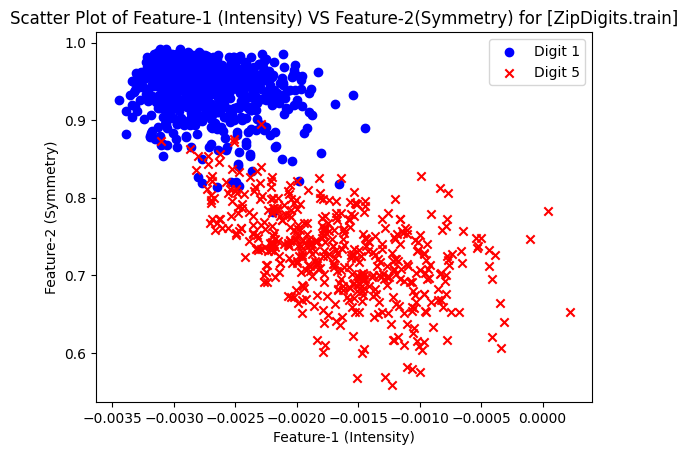

In [ ]:
# Function / Code to display the Plot

def extract_selected_digits(features, labels, selected_digits=[1, 5]):
    selected_mask = np.isin(labels[:, 0], selected_digits)
    return features[selected_mask], labels[selected_mask]

features_filtered, labels_filtered = extract_selected_digits(Xdigitstrain, ydigitstrain, selected_digits=[1, 5])

intensity_values = computeIntensity(features_filtered)
symmetry_values = computeSymmetry(features_filtered)

features_digit_1 = features_filtered[labels_filtered[:, 0] == 1]
features_digit_5 = features_filtered[labels_filtered[:, 0] == 5]

plt.scatter(intensity_values[labels_filtered[:, 0] == 1], symmetry_values[labels_filtered[:, 0] == 1], c='blue', marker='o', label='Digit 1')
plt.scatter(intensity_values[labels_filtered[:, 0] == 5], symmetry_values[labels_filtered[:, 0] == 5], c='red', marker='x', label='Digit 5')

plt.xlabel('Feature-1 (Intensity)')
plt.ylabel('Feature-2 (Symmetry)')
plt.legend(loc='upper right')
plt.title('Scatter Plot of Feature-1 (Intensity) VS Feature-2(Symmetry) for [ZipDigits.train]')
plt.show()

In [ ]:

'''
Construct the training and test sets for the rest of the exercises on classifying 1s vs 5s
'''

digit_idxs_train = indexDigits(Xaugtrain)

X1train = Xaugtrain[digit_idxs_train[1], :]
print(X1train)
N1train = X1train.shape[0]
print(f'number of 1s: {N1train}')

X5train = Xaugtrain[digit_idxs_train[5], :]
print(X5train)
N5train = X5train.shape[0]
print(f'number of 5s: {N5train}')

Xtrain = Xaugtrain[digit_idxs_train[1]+digit_idxs_train[5], :]
ytrain = np.concatenate((np.ones((N1train, 1)), -1*np.ones((N5train, 1))), axis=0)
Ntrain, d = Xtrain.shape
print(f'number of 1s and 5s: {Ntrain}')
print(f'Xtrain shape: {Xtrain.shape}, ytrain shape: {ytrain.shape}')

[[ 1.         -0.00295653  0.94128125]
 [ 1.         -0.00302855  0.91885156]
 [ 1.         -0.0030167   0.97025   ]
 ...
 [ 1.         -0.00274721  0.96798438]
 [ 1.         -0.00180156  0.85717187]
 [ 1.         -0.0028498   0.95351172]]
number of 1s: 864
[[ 1.00000000e+00 -4.38189338e-04  7.33136719e-01]
 [ 1.00000000e+00 -2.21190257e-03  7.98503906e-01]
 [ 1.00000000e+00 -1.53725490e-03  8.06718750e-01]
 ...
 [ 1.00000000e+00 -1.06049326e-03  6.90933594e-01]
 [ 1.00000000e+00 -1.57838542e-03  7.10816406e-01]
 [ 1.00000000e+00 -6.43734681e-04  7.57636719e-01]]
number of 5s: 468
number of 1s and 5s: 1332
Xtrain shape: (1332, 3), ytrain shape: (1332, 1)


In [ ]:
digit_idxs_test = indexDigits(Xaugtest)

Xtest = Xaugtest[digit_idxs_test[1]+digit_idxs_test[5], :]
ytest = np.concatenate((np.ones((len(digit_idxs_test[1]), 1)), -1*np.ones((len(digit_idxs_test[5]), 1))), axis=0)
Ntest, d = Xtest.shape
print(f'number of 1s and 5s: {Ntest}')
print(f'Xtest shape: {Xtest.shape}, ytest shape: {ytest.shape}')

number of 1s and 5s: 424
Xtest shape: (424, 3), ytest shape: (424, 1)


Xtrain shape: (1332, 3)
ytrain shape: (1332, 1)


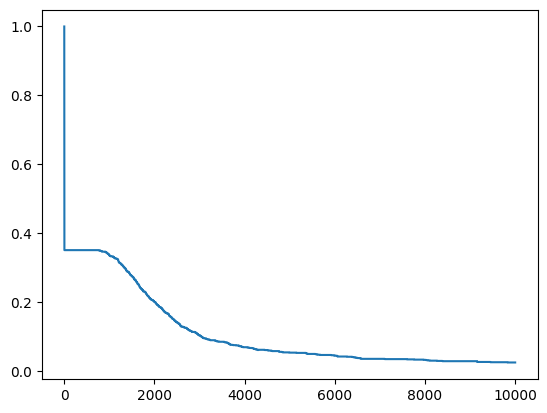

In [ ]:
def sigmoid(s):
    '''
    Implements the sigmoid function
    '''
    return 1 / (1 + np.exp(-s))

def gradientCrossEntropyError(w, X, y):
    '''
    Computes the gradient of the cross entropy error function on the dataset X, y at input weights w
    See LFD Exercise 3.7
    Input:
        w: a 2D (d+1) x 1 numpy array
        X: a 2D N x (d+1) numpy array
        y: a 2D N x 1 numpy array
    Output:
        gradient: a 2D (d+1) x 1 numpy array,
                  gradient of the cross entropy error function on the dataset X, y at input weights w
    '''
    N, d = X.shape
    grad = np.zeros((d, 1))

    for n in range(N):
        x_n = X[n].reshape(-1, 1)
        y_n = y[n][0]
        sigmoid_term = sigmoid(-y_n * np.dot(w.T, x_n))
        grad += -y_n * x_n * sigmoid_term

    grad /= N  # Normalize by the number of examples
    return grad

def logisticRegression(X, y, eta=0.001, w_init=None, max_iters=1000):
    '''
    Implements the gradient descent algorithm for Logistic Regression
    See LFD Example 3.3
    Input:
        X: A 2D N x (d+1) numpy array
           The i-th row X[i, :] contains features for the i-th example in the training set
           X[i, 0] = 1
           X[i, 1], ... X[i, d] have values of features
        y: A 2D N x 1 numpy array
           y[i, 0] is the label associated with the i-th example
        eta: positive real number, learning rate
        w_init: A 2D (d+1) x 1 numpy array, initial weights to start gradient descent
        max_iters: positive integer, maximum number of iterations of gradient descent
    Output:
        w: A 2D (d+1) x 1 numpy array, weights with (approximately) lowest error on the input training set X, y
    '''
    N, d = X.shape
    w = np.zeros((d, 1))
    if not isinstance(w_init, type(None)):
        w = w_init
    Eins = []

    for i in range(max_iters):
        Ein = E(w, X, y)
        Eins.append(Ein)
        grad = gradientCrossEntropyError(w, X, y)

        # Update weights using gradient descent
        w -= eta * grad

    plt.plot(range(max_iters), Eins)
    return w, Eins

print("Xtrain shape:", Xtrain.shape)
print("ytrain shape:", ytrain.shape)

max_iters = 10000
eta = 0.1
w_log, lr_Eins= logisticRegression(Xtrain, ytrain, eta=eta, max_iters=max_iters)

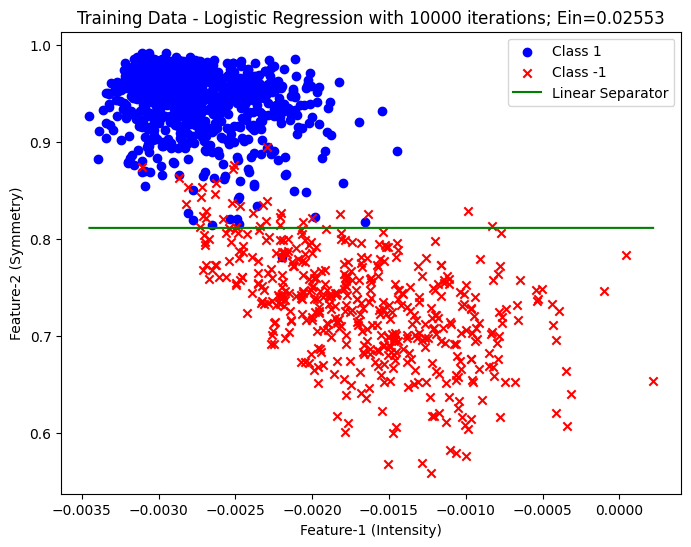

In [ ]:
Ein = np.round(E(w_log, Xtrain, ytrain), 5)
plotLinearSeparator(w_log, Xtrain, ytrain, title=f'Training Data - Logistic Regression with {max_iters} iterations; Ein={Ein}')

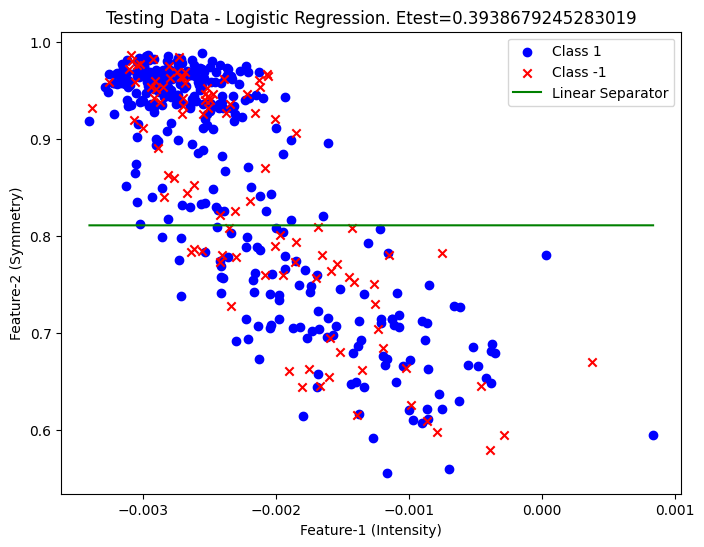

In [ ]:
Etest = E(w_log, Xtest, ytest)
plotLinearSeparator(w_log, Xtest, ytest,title=f'Testing Data - Logistic Regression. Etest={Etest}')

**Q.2 - B**

In [ ]:
Z_Ein = E(w_log, Xtrain, ytrain)
print('Ein on our training data: ',Z_Ein)

Z_Etest = E(w_log, Xtest, ytest)
print('Etest on out Test Data: ',Z_Etest)

Ein on our training data:  0.025525525525525526
Etest on out Test Data:  0.3938679245283019


**Q.2 - C**

In [ ]:
def hoeffding_bound(empirical_error, N, delta):
    return 2 * np.exp(-2 * N * delta**2)

# Set the tolerance
delta = 0.05

# Calculate the bounds for Ein and Etest
bound_Ein = hoeffding_bound(Ein, len(Xtrain), delta)
bound_Etest = hoeffding_bound(Etest, len(Xtest), delta)

# Print the bounds
print(f'Hoeffding Bound for Ein: {bound_Ein:.4f}')
print(f'Hoeffding Bound for Etest: {bound_Etest:.4f}')


Hoeffding Bound for Ein: 0.0026
Hoeffding Bound for Etest: 0.2401


**Q.2 - D**

In [ ]:
from itertools import permutations, combinations_with_replacement
def polynomialTransform(X, Q):
    '''
    Compute the polynomial transform features
    See LFD Example 3.3
    Input:
        X: a 2D N x (d+1) numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
        Q: positive integer, the desired degree of polynomial
    Output:
        Z: A 2D N x (dtilde+1) numpy array
           The n-th row Z[n, :] contains features corresponding to the Q-th order polynomial transform of X[n, :]
           Z[n, 0] = 1
           Z[n, 1], ..., Z[dtilde] contain the transformed features
    Warning and TODO: This is a hack! Can we do better?
    '''
    '''
    Init
    '''
    N, d = X.shape
    if np.all(X[:, 0] == np.ones((N, 1))):
        X = X[:, 1:]
    N, d = X.shape
    # TODO: Compute the features of the Q-th order polynomial transform.
    # It may be easier to implement it only for the value of Q specified in the homework
    # instead of implementing it for all possible values of Q.
    degrees = range(Q+1)
    perms = permutations(range(d))
    perms = list(perms)
    combs = combinations_with_replacement(degrees, d)
    combs = list(combs)
    '''
    List feature names
    '''
    terms = []
    ftnames = []
    for c in combs:
        if np.sum(c) == 0:
            continue
        if np.sum(c) > Q:
            continue
        for p in perms:
            ftname = '*'.join(sorted([f'x[{p[i]}]^{c[i]}' for i in range(d)]))
            if ftname in ftnames:
                continue
            terms.append((c, p))
            ftnames.append(ftname)
    '''
    Compute features
    '''
    Z = []
    for n in range(N):
        x = X[n, :]
        z = []
        for t in terms:
            (c, p) = t
            v = np.prod([x[p[i]]**c[i] for i in range(d)])
            z.append(v)
        z = [1] + z
        Z.append(z)
    Z = np.array(Z)
    return Z

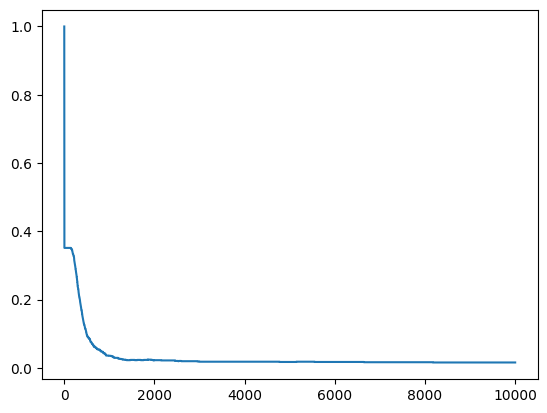

In [ ]:
def logisticRegressionWithPoly(X, y, Q, eta=0.001, w_init=None, max_iters=1000):
    '''
    Implements the gradient descent algorithm for Logistic Regression with polynomial features
    Input:
        X: A 2D N x (d+1) numpy array
           The i-th row X[i, :] contains features for the i-th example in the training set
           X[i, 0] = 1
           X[i, 1], ... X[i, d] have values of features
        y: A 2D N x 1 numpy array
           y[i, 0] is the label associated with the i-th example
        Q: positive integer, the desired degree of polynomial
        eta: positive real number, learning rate
        w_init: A 2D (dtilde+1) x 1 numpy array, initial weights to start gradient descent
        max_iters: positive integer, maxmimum number of iterations of gradient descent
    Output:
        w: A 2D (dtilde+1) x 1 numpy array, weights with (approximately) lowest error on the input training set X, y
    '''
    N, d = X.shape
    Z = polynomialTransform(X, Q)
    dtilde = Z.shape[1]
    w = np.zeros((dtilde, 1))
    if not isinstance(w_init, type(None)):
        w = w_init
    Eins = []
    for i in range(max_iters):
        Ein = E(w, Z, y)
        Eins.append(Ein)
        grad = gradientCrossEntropyError(w, Z, y)
        w += -eta * grad
    plt.plot(range(max_iters), Eins)
    return w,Eins

# Assume Xtrain_poly is the polynomial transform of Xtrain with Q=3
#Xtrain_poly = polynomialTransform(Xtrain, Q=3)
#w_poly , plr_Eins = logisticRegressionWithPoly(Xtrain, ytrain, Q=3, eta=eta, max_iters=max_iters)
max_iters = 10000
eta = 0.1
Xtrain_poly = polynomialTransform(Xtrain, Q=3)
pw_log, plr_Eins= logisticRegression(Xtrain_poly, ytrain, eta=eta, max_iters=max_iters)

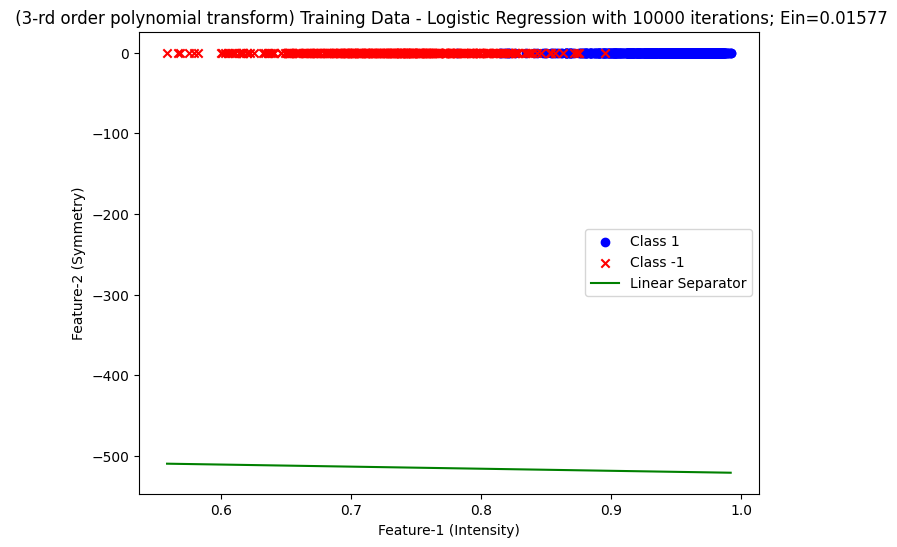

In [ ]:
Poly_Ein = np.round(E(pw_log, Xtrain_poly, ytrain), 5)
plotLinearSeparator(pw_log, Xtrain_poly, ytrain, title=f' (3-rd order polynomial transform) Training Data - Logistic Regression with {max_iters} iterations; Ein={Poly_Ein}')

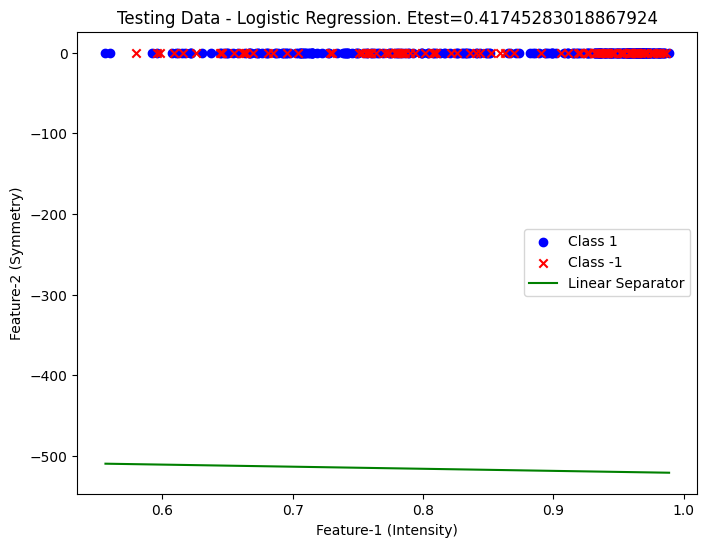

In [ ]:
Xtest_poly = polynomialTransform(Xtest, Q=3)
Ploy_Etest = E(pw_log, Xtest_poly, ytest)
plotLinearSeparator(pw_log, Xtest_poly, ytest,title=f'Testing Data - Logistic Regression. Etest={Ploy_Etest}')

In [ ]:
def predictClassLinear(w, X):
    '''
    Input:
        w: a 2D (d+1) x 1 numpy array of weights for a linear hypothesis
        X: a 2D N x (d+1) numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
    Output:
        yhat: an N x 1 2 dimensional numpy array orf predictions
    '''
    yhat = np.sign(np.matmul(X, w))
    return yhat

In [ ]:
def plotNonLinearSeparator(w, X, y, Q=3, title=''):
    '''
    Plot the "effective" decision boundary and half spaces
    determined by a non-linear separator in 2D space
    which is picked from a linear model in higher dimensional space
    using the polynomial transform
    Input:
        w: a (d+1) x 1 2 dimensional numpy array of weights for a linear hypothesis
        X: a 2D N x (d+1) numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
        y: a 2D N x (d+1) numpy array
           y[i, 0] is the label associated with the i-th example
        Q: The desired degree of polynomial
        title: a string
    Output:
        No output
    '''
    fig, axs = plt.subplots(figsize=(5,5))
    '''
    Plot separator
    '''
    pltx1s = np.linspace(-1, 0.21, 100)
    pltx2s = np.linspace(-1, 0.1, 100)
    pltX = np.array([[1, x, y] for x in pltx1s for y in pltx2s])
    # a function that performs the polynomial transform
    pltZ = polynomialTransform(pltX, Q=Q)
    #pltyhat = predictClassLinear(w, pltZ)
    pltyhat = np.sign(np.matmul(pltZ, w))
    pltx1s = pltX[:, 1].reshape((pltX.shape[0], 1))
    pltx2s = pltX[:, 2].reshape((pltX.shape[0], 1))
    cmap = ListedColormap(['lightcoral', 'lightskyblue'])
    axs.scatter(pltx1s, pltx2s, c=pltyhat, cmap=cmap)
    '''
    Plot data points
    '''
    plus1s = np.where(y == 1)[0]
    minus1s = np.where(y == -1)[0]
    Xplus1s = X[plus1s, :]
    Xminus1s = X[minus1s, :]
    axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
                color='blue', facecolors='none', label='1')
    axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
                marker='x', color='red', label='5')
    '''
    Finishing touches
    '''
    axs.set_xlabel('intensity')
    axs.set_ylabel('symmetry')
    axs.set_xlim(-1, 0.2)
    axs.set_ylim(-1, 0.1)
    axs.set_title(title)
    axs.legend()
    plt.show()

NameError: name 'ListedColormap' is not defined

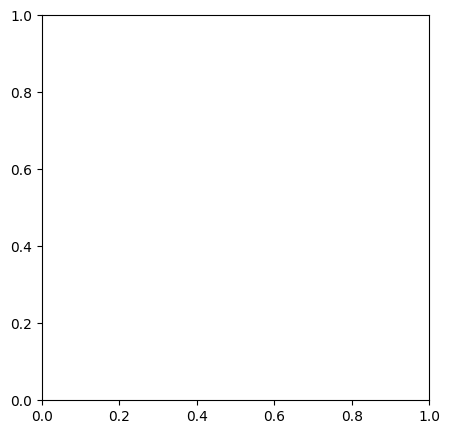

In [ ]:
#plotNonLinearSeparator(pw_log, Xtrain_poly, ytrain, 3, title=f' (3-rd order polynomial transform) Training Data - Logistic Regression with {max_iters} iterations; Ein={Poly_Ein}')
from matplotlib.colors import ListedColormap
plotNonLinearSeparator(pw_log, Xtrain, ytrain,title=f' (3-rd order polynomial transform) Training Data - Logistic Regression with {max_iters} iterations; Ein={Poly_Ein}')

In [ ]:
plotNonLinearSeparator(pw_log, Xtest, ytest,title=f' (3-rd order polynomial transform) Testing Data - Logistic Regression with {max_iters} iterations; Etest={Ploy_Etest}')

In [ ]:
Zpoly_Ein = E(pw_log, Xtrain_poly, ytrain)
print('(3-rd order polynomial transform) Ein on our training data (ZipDigits.train) through Separator (Ein): ',Zpoly_Ein)

Zpoly_Etest = E(pw_log, Xtest_poly, ytest)
print('(3-rd order polynomial transform) Etest, the error on out Test Data (ZipDigits.test) through Sepator (Etest): ',Zpoly_Etest)

In [ ]:
def hoeffding_bound(empirical_error, N, delta):
    return 2 * np.exp(-2 * N * delta**2)

# Set the tolerance
delta = 0.05

# Calculate the bounds for Ein and Etest
polybound_Ein = hoeffding_bound(Zpoly_Ein, len(Xtrain_poly), delta)
polybound_Etest = hoeffding_bound(Zpoly_Etest, len(Xtest_poly), delta)

# Print the bounds
print(f'(3-rd order polynomial transform) Hoeffding Bound for Ein: {polybound_Ein:.4f}')
print(f'(3-rd order polynomial transform) Hoeffding Bound for Etest: {polybound_Etest:.4f}')

NameError: name 'Zpoly_Ein' is not defined